<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/Curso_Testes_estatisticos_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Aula 01 - Conhecendo e Explorando os dados

In [2]:
#Visualizando os dados do TMDB
tmdb = pd.read_csv('/content/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
#vendo a descrição destes dados (média, mediana, quartis, desvio padrão, etc)
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

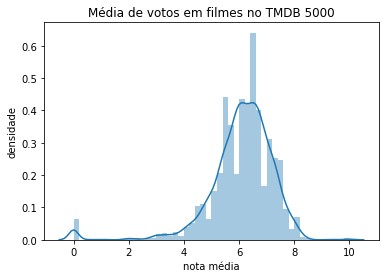

In [4]:
#visualizando a distribuição
ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel='nota média', ylabel='densidade')
ax.set_title('Média de votos em filmes no TMDB 5000')

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

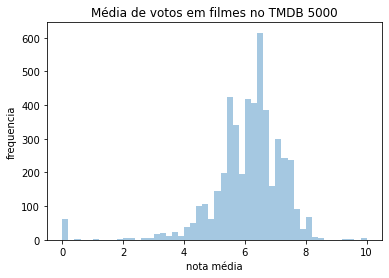

In [5]:
#visualizando a média de votos sem a linha de KDE
ax = sns.distplot(tmdb.vote_average, norm_hist=False, kde=False)
ax.set(xlabel='nota média', ylabel='frequencia')
ax.set_title('Média de votos em filmes no TMDB 5000')

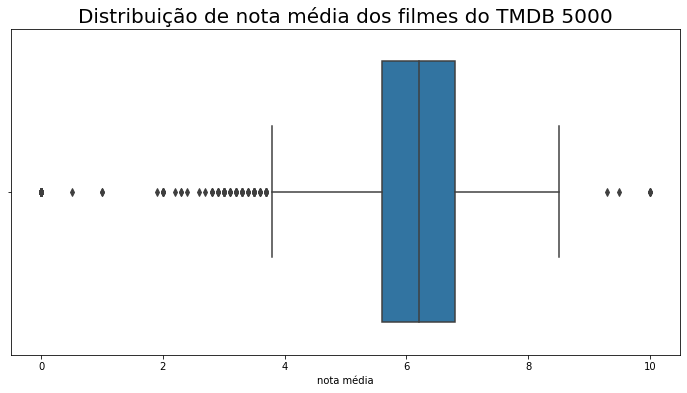

In [6]:
#Vendo o BoxPlot da média dos filmes no TMDB
plt.figure(figsize=(12,6))
ax = sns.boxplot(tmdb.vote_average)
ax.set(xlabel='nota média')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000', fontsize=20)
plt.show()


In [7]:
#Visualizando filmes com média 0
tmdb.query("vote_average == 0").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [8]:
#visualizando filmes com mais de 10 votos
tmdb.query("vote_average == 10")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


In [9]:
#Criando um novo dataframe, excluindo aqueles filmes com menos de 10 votos, para diminuir o ruído em nossa distribuição
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10")
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


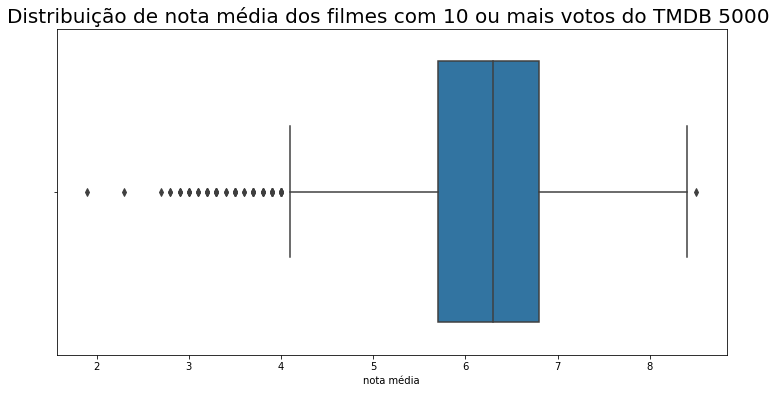

In [10]:
#Fazendo um novo boxplot, retirando os filmes com menos de 10 votos
plt.figure(figsize=(12,6))
ax = sns.boxplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='nota média')
ax.set_title('Distribuição de nota média dos filmes com 10 ou mais votos do TMDB 5000 ', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

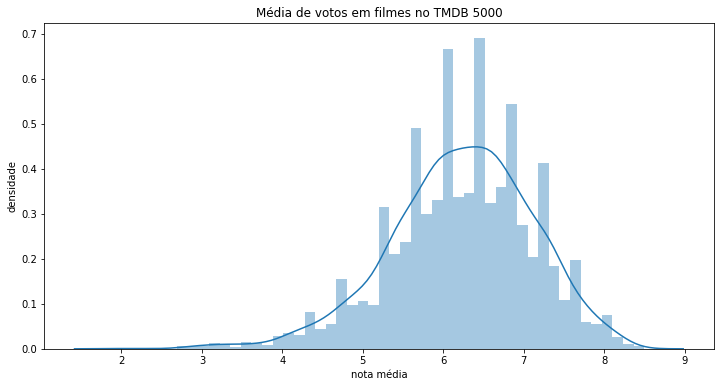

In [11]:
#Visualizando a nova distribuição
plt.figure(figsize=(12,6))
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='nota média', ylabel='densidade')
ax.set_title('Média de votos em filmes no TMDB 5000')

## Aula 02 - Explorando a distribuição das Amostras

## Analisando o MovieLens

In [12]:
notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
nota_media_por_filme = notas.groupby('movieId').mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens 100mil')

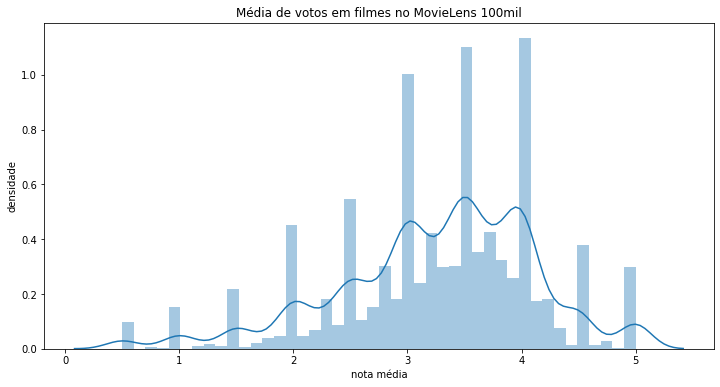

In [14]:
plt.figure(figsize=(12,6))
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel='nota média', ylabel='densidade')
ax.set_title('Média de votos em filmes no MovieLens 100mil')

In [15]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
quantidade_de_votos_por_filme.query("rating >= 10")

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
5,49,49,49
6,102,102,102
...,...,...,...
174055,13,13,13
176371,18,18,18
177765,13,13,13


In [17]:
quantidade_de_votos_por_filme.shape

(9724, 3)

In [18]:
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos


Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2269)

In [19]:
#buscando por indice
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens 100mil com 10 ou mais votos')

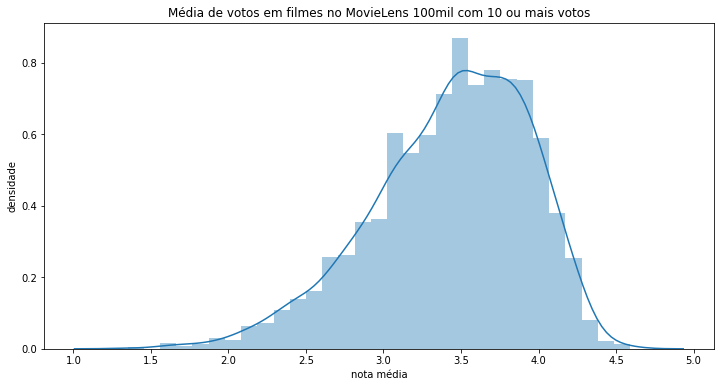

In [20]:
plt.figure(figsize=(12,6))
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='nota média', ylabel='densidade')
ax.set_title('Média de votos em filmes no MovieLens 100mil com 10 ou mais votos')

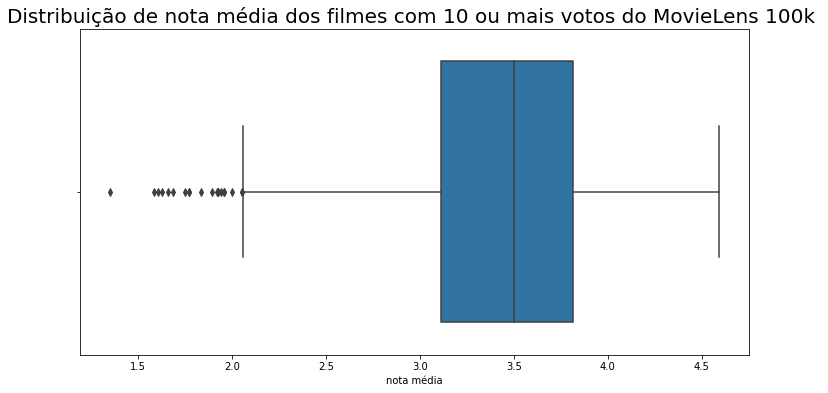

In [21]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='nota média')
ax.set_title('Distribuição de nota média dos filmes com 10 ou mais votos do MovieLens 100k ', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens 100mil com 10 ou mais votos')

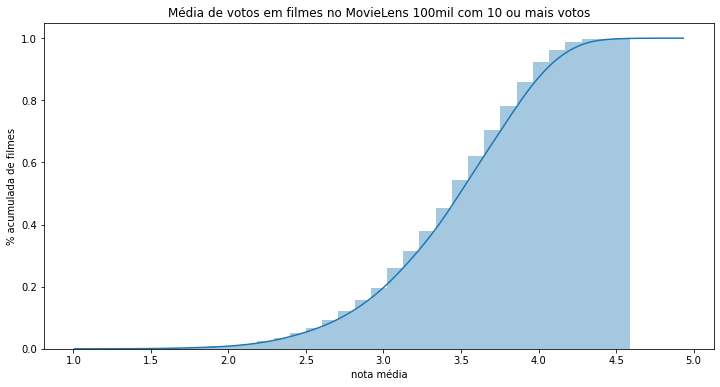

In [22]:
#histograma com cumulative do matplotlib
plt.figure(figsize=(12,6))
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.set(xlabel='nota média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes no MovieLens 100mil com 10 ou mais votos')

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 com 10 ou mais votos')

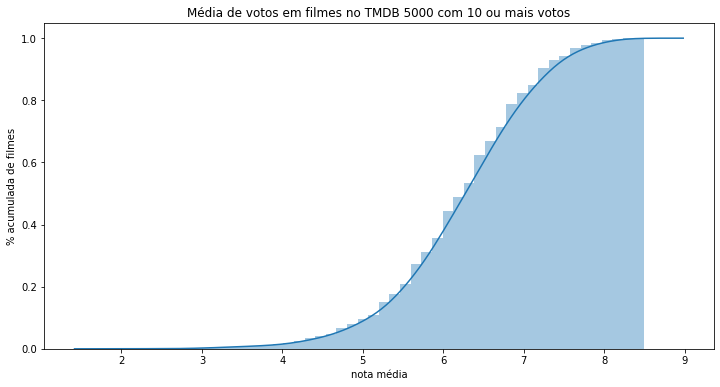

In [23]:
#histograma com cumulative do matplotlib
plt.figure(figsize=(12,6))
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.set(xlabel='nota média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes no TMDB 5000 com 10 ou mais votos')

### Analisando a distribuição dos dados capturados de outros campos do TMDB

In [24]:
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Text(0.5, 1.0, 'Quantidade de votos em filmes no TMDB 5000 com 10 ou mais votos')

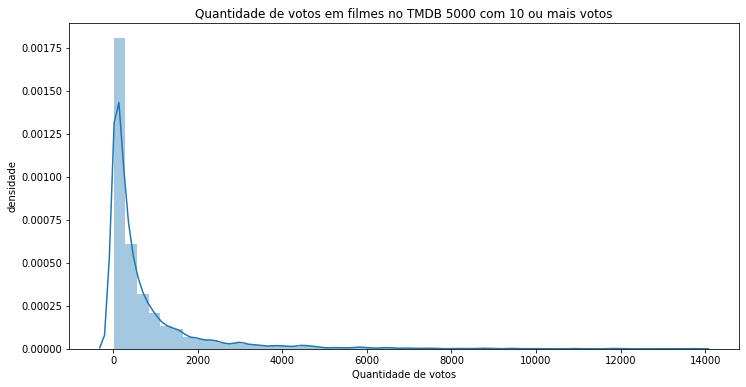

In [25]:
plt.figure(figsize=(12,6))
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel='Quantidade de votos', ylabel='densidade')
ax.set_title('Quantidade de votos em filmes no TMDB 5000 com 10 ou mais votos')

Text(0.5, 1.0, 'Gastos dos filmes no TMDB 5000')

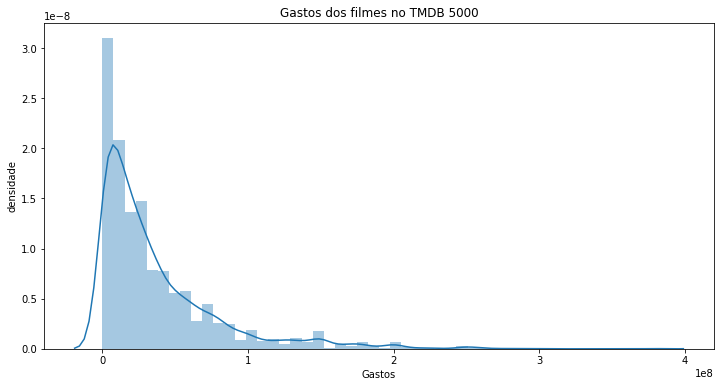

In [26]:
#orçamento
plt.figure(figsize=(12,6))
ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel='Gastos', ylabel='densidade')
ax.set_title('Gastos dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Popularidade dos filmes no TMDB 5000')

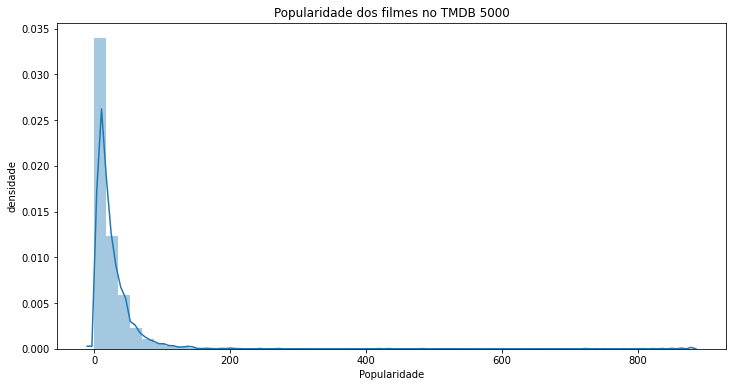

In [27]:
#popularidade
plt.figure(figsize=(12,6))
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel='Popularidade', ylabel='densidade')
ax.set_title('Popularidade dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

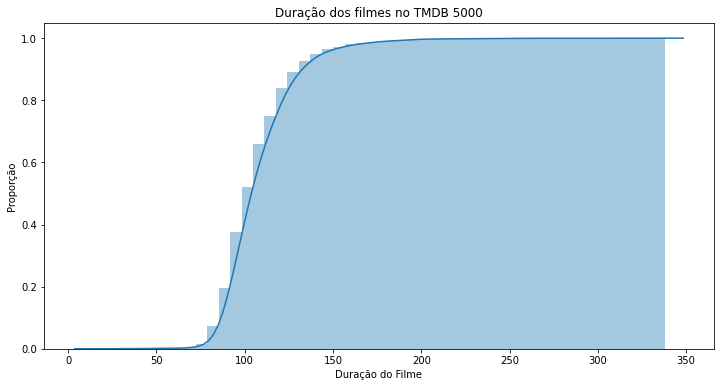

In [28]:
#tempo de duração - cumulativo
plt.figure(figsize=(12,6))
ax = sns.distplot(tmdb.query("runtime >0").runtime.dropna(), hist_kws={'cumulative': True}, kde_kws={'cumulative':True})
ax.set(xlabel='Duração do Filme', ylabel='Proporção')
ax.set_title('Duração dos filmes no TMDB 5000')

In [29]:
tmdb.runtime.isna().sum()

2

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

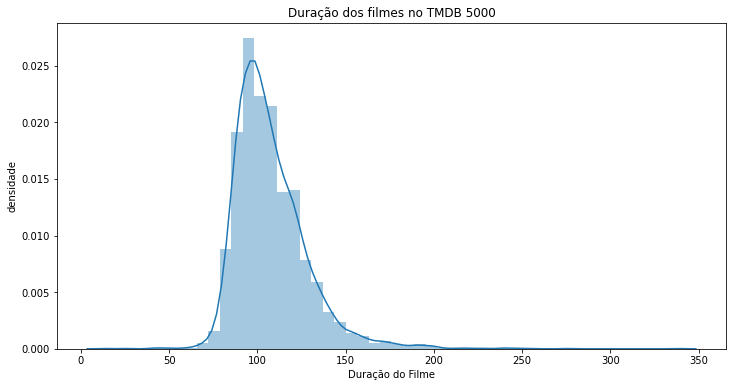

In [30]:
#tempo de duração - Histograma normal
plt.figure(figsize=(12,6))
ax = sns.distplot(tmdb.query("runtime >0").runtime.dropna())
ax.set(xlabel='Duração do Filme', ylabel='densidade')
ax.set_title('Duração dos filmes no TMDB 5000')

In [31]:
tmdb.query("runtime >0").runtime.dropna().quantile(0.8)

121.0

## Aula 03 - Efeito do tamanho de uma amostra

### MovieLens, média dos filmes com mais de 10 votos

In [32]:
nota_media_dos_filmes_com_pelo_menos_10_votos

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

In [33]:
 #Média dos filmes com pelo menos 10 votos
 nota_media_dos_filmes_com_pelo_menos_10_votos.mean()

3.4320503405352603

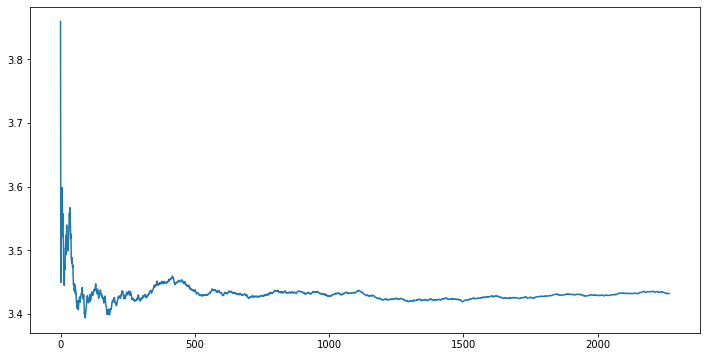

In [34]:
#vendo a média pelo número de amostras
np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)
#maneira menos verbosa de fazer um for no python
medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.figure(figsize=(12,6))
plt.plot(medias)


### Medindo um intervalo de confiança para poder generalizar o resultado de uma amostra

In [35]:
#dado meu conjunto de dados e considerando que é uma distribuição normal e com n suficiente, este é o intervalo de confiança desta amostra
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

In [36]:
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [37]:
#calculando o intervalo de confiança usando um teste T - o T foi feito para amostras pequenas
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)

In [38]:
#usando a significancia de 5%
descr_todos_com_10_votos.tconfint_mean(0.05)

(3.411234839229381, 3.4528658418411395)

## Aula 04  - ZTest e TTest

### Analisando o filme 1

In [39]:
#comparando médias
filmes = pd.read_csv('movies.csv')
filmes.query('movieId ==1')


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [40]:
notas_1 = notas.query('movieId ==1')
notas_1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Text(0.5, 1.0, 'Distribuição de notas para o filme Toy Story')

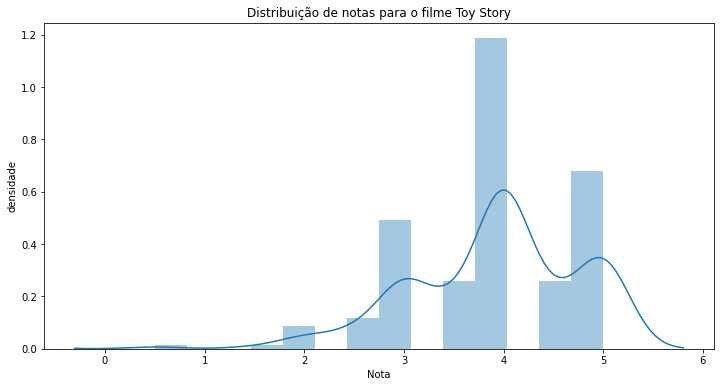

In [41]:
#histograma do ToyStory
plt.figure(figsize=(12,6))
ax = sns.distplot(notas_1.rating)
ax.set(xlabel='Nota', ylabel='densidade')
ax.set_title('Distribuição de notas para o filme Toy Story')

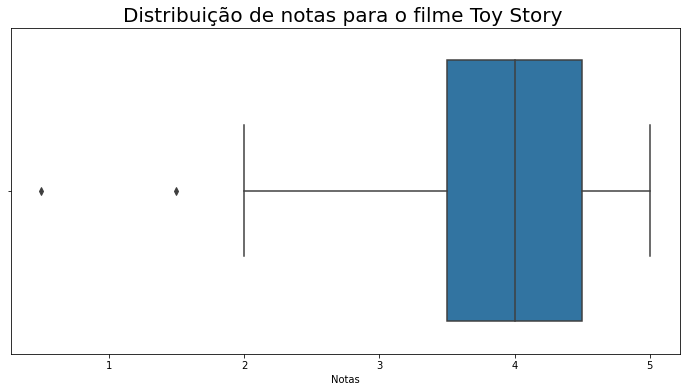

In [42]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(notas_1.rating)
ax.set(xlabel='Notas')
ax.set_title('Distribuição de notas para o filme Toy Story ', fontsize=20)
plt.show()

In [43]:
notas_1.rating.mean()

3.9209302325581397

In [44]:
notas_1.shape

(215, 4)

In [45]:
#intervalo de confiança de 5%
zconfint(notas_1.rating)

(3.8093359183563402, 4.032524546759939)

In [46]:
#Hipótese nula: As notas do Toy Story tem a mesma média da média total
z_teste, p_valor = ztest(notas_1.rating, value=nota_media_dos_filmes_com_pelo_menos_10_votos.mean())
print(z_teste)
print(p_valor)

8.586342305916716
8.978190401886942e-18


In [47]:
#teste de hipótese: se p_valor < =  significancia (neste caso 5%, rejeitamos a hipótese nula)
#teste bastante sensível no big Data - talvez sensível demais
p_valor <= 0.05

True

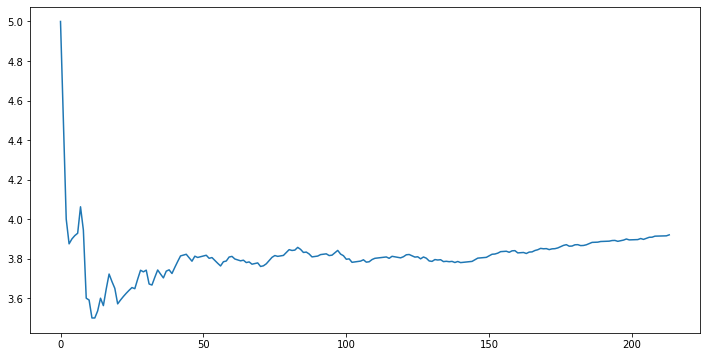

In [48]:
#fazendo o plot do tamanho das amostras
#vendo a média pelo número de amostras
np.random.seed(75241)
temp = notas_1.sample(frac=1)['rating']
#maneira menos verbosa de fazer um for no python
medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.figure(figsize=(12,6))
plt.plot(medias)



In [49]:
#aplicando o ZTest com poucas amostras

np.random.seed(75241)
temp = notas_1.sample(frac=1)['rating']
def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p_value = ztest(temp[0:i], value = nota_media_dos_filmes_com_pelo_menos_10_votos.mean())
  return (i, media,p_value)

#maneira menos verbosa de fazer um for no python
valores = np.array([calcula_teste(i) for i in range(2, len(temp))])
valores



array([[2.00000000e+00, 4.50000000e+00, 3.26876211e-02],
       [3.00000000e+00, 4.00000000e+00, 3.25254351e-01],
       [4.00000000e+00, 3.87500000e+00, 2.99521970e-01],
       [5.00000000e+00, 3.90000000e+00, 1.58267818e-01],
       [6.00000000e+00, 3.91666667e+00, 7.40693646e-02],
       [7.00000000e+00, 3.92857143e+00, 3.05837219e-02],
       [8.00000000e+00, 4.06250000e+00, 8.54684682e-03],
       [9.00000000e+00, 3.94444444e+00, 3.43513698e-02],
       [1.00000000e+01, 3.60000000e+00, 6.79775744e-01],
       [1.10000000e+01, 3.59090909e+00, 6.66104056e-01],
       [1.20000000e+01, 3.50000000e+00, 8.45259443e-01],
       [1.30000000e+01, 3.50000000e+00, 8.31972270e-01],
       [1.40000000e+01, 3.53571429e+00, 7.28503654e-01],
       [1.50000000e+01, 3.60000000e+00, 5.56156495e-01],
       [1.60000000e+01, 3.56250000e+00, 6.28416636e-01],
       [1.70000000e+01, 3.64705882e+00, 4.20561961e-01],
       [1.80000000e+01, 3.72222222e+00, 2.69271809e-01],
       [1.90000000e+01, 3.68421

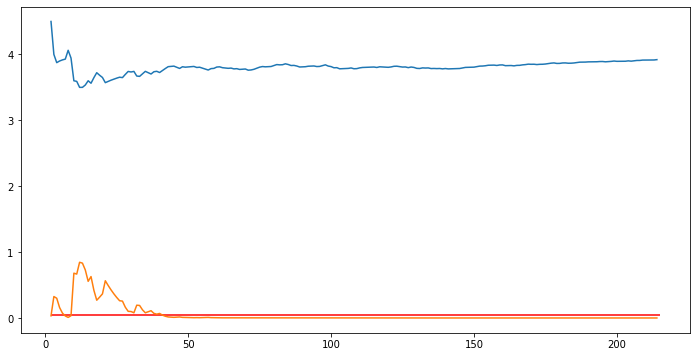

In [50]:
plt.figure(figsize=(12,6))
plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax=len(temp), colors='r')

## Aula 05: Testes para duas amostras

In [51]:
notas_1.rating, notas.rating

(0        4.0
 516      4.0
 874      4.5
 1434     2.5
 1667     4.5
         ... 
 97364    2.5
 98479    4.0
 98666    2.5
 99497    3.0
 99534    5.0
 Name: rating, Length: 215, dtype: float64, 0         4.0
 1         4.0
 2         4.0
 3         5.0
 4         5.0
          ... 
 100831    4.0
 100832    5.0
 100833    5.0
 100834    5.0
 100835    3.0
 Name: rating, Length: 100836, dtype: float64)

In [52]:
zconfint(notas_1.rating, notas.rating)

(0.2799245129192442, 0.5588219849631111)

In [53]:
#conferindo se as notas_1 tem uma média maior que a geral
print(ztest(notas_1.rating, notas.rating))

(5.894327101501841, 3.762112778881965e-09)


In [55]:
#usando o ttest
from scipy.stats import ttest_ind

In [56]:
ttest_ind(notas_1.rating, notas.rating)

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [58]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas_1.rating)

In [61]:
#criando uma comparação pra usar o CompareMeans()
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

In [63]:
#usando o ztest
print(comparacao.summary())


                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.4194      0.071     -5.894      0.000      -0.559      -0.280


In [64]:
#usando o ttest
print(comparacao.summary(use_t=True))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.4194      0.071     -5.894      0.000      -0.559      -0.280


### Visualização gráfica

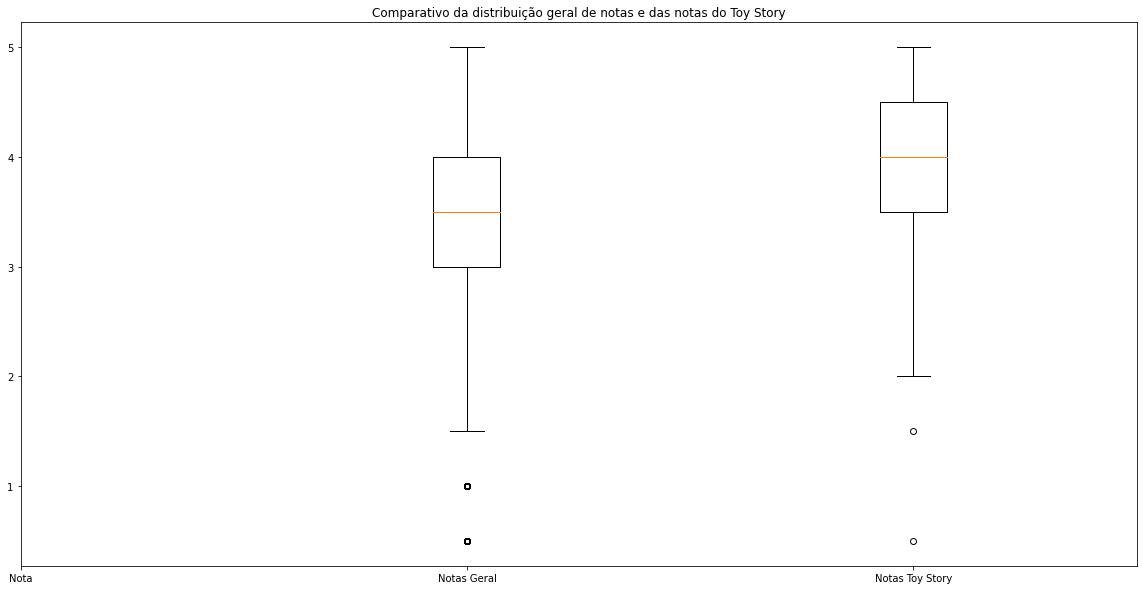

In [76]:
#Criando um boxplot com os dois dados que estamos comparando
plt.figure(figsize=(20,10))
plt.boxplot([notas.rating, notas_1.rating], labels=['Todas as Notas', 'Toy Story'])
plt.title('Comparativo da distribuição geral de notas e das notas do Toy Story')
plt.xticks(np.arange(3), ('Nota','Notas Geral', 'Notas Toy Story'))
plt.show()

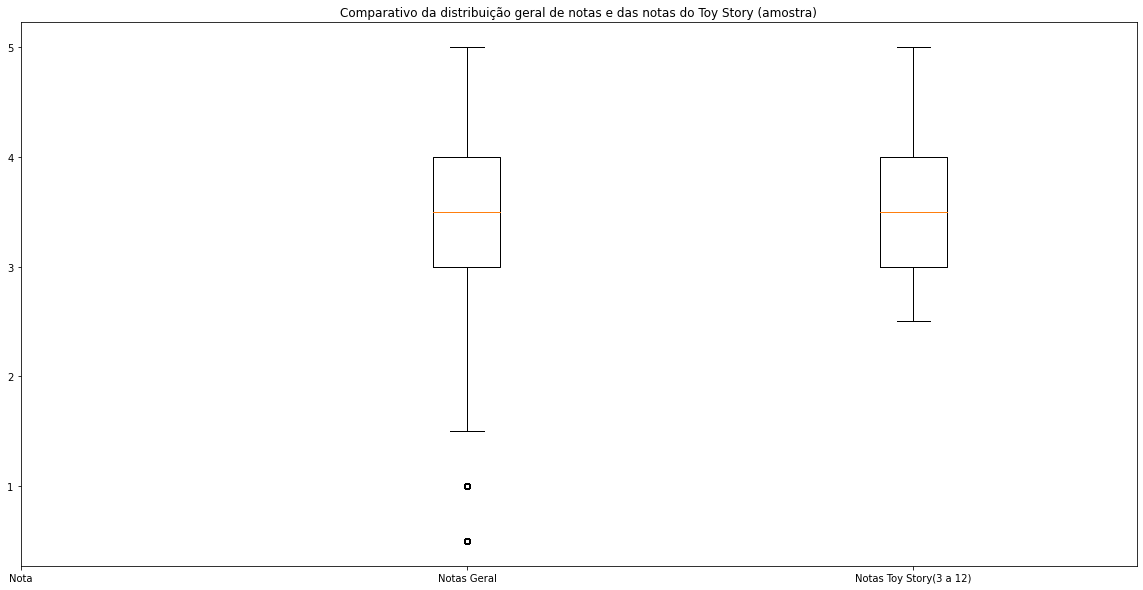

In [77]:
#vendo como seria usando um sample menor
plt.figure(figsize=(20,10))
plt.boxplot([notas.rating, notas_1.rating[3:12]], labels=['Todas as Notas', 'Toy Story'])
plt.title('Comparativo da distribuição geral de notas e das notas do Toy Story (amostra)')
plt.xticks(np.arange(3), ('Nota','Notas Geral', 'Notas Toy Story(3 a 12)'))
plt.show()


In [78]:
#Aplicando os testes para esta amostra menor
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas_1[3:12].rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
print(comparacao.summary(use_t=True))


                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0540      0.348     -0.155      0.877      -0.735       0.627


## Aula 06 - Testes não paramétricos

### Comparando a média de dois filmes

In [79]:
filmes.query('movieId in [1, 593,72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


In [83]:
#criando as variáveis para os dois outros filmes (já temos a do Toy Story gravada no notas_1)
notas_593 = notas.query('movieId == 593')
notas_72226 = notas.query('movieId == 72226')
print(notas_593.shape, notas_72226.shape)

(279, 4) (18, 4)


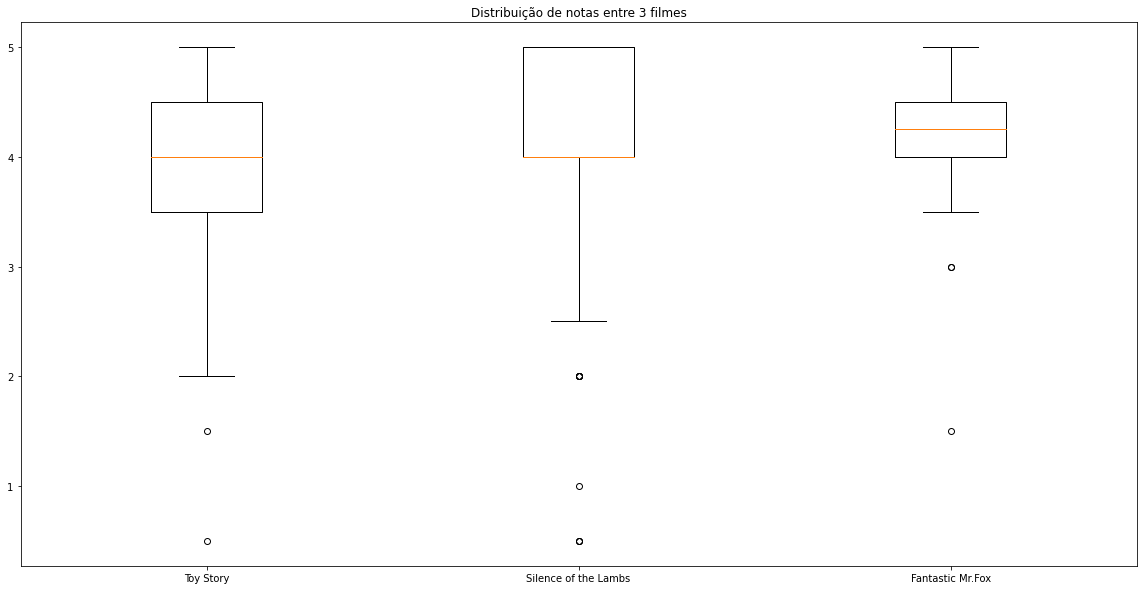

In [85]:
#primeiro vamos visualizar os 3 boxplots
plt.figure(figsize=(20,10))
plt.boxplot([notas_1.rating, notas_593.rating, notas_72226.rating], labels=['Toy Story', 'Silence of the Lambs', 'Fantastic Mr.Fox'])
plt.title('Distribuição de notas entre 3 filmes')
plt.show()

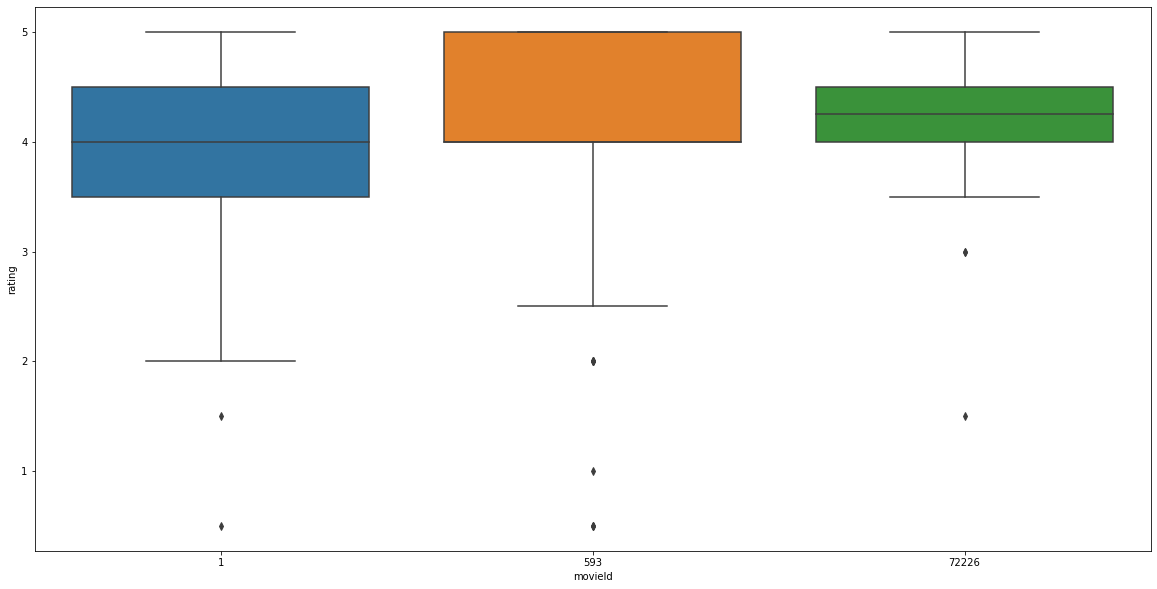

In [89]:
#usando o Seaborn não precisamos criar as variáveis
plt.figure(figsize=(20,10))
sns.boxplot(x = "movieId", y="rating", data = notas.query("movieId in [1,593,72226]"))
plt.show()

### Aplicando testes paramétricos

In [95]:
#Vamos chamar as estatísticas descritivas destes filmes
descr_1 = DescrStatsW(notas_1.rating)
descr_593 = DescrStatsW(notas_593.rating)
descr_72226 = DescrStatsW(notas_72226.rating)
#comparando Silêncio dos Inocentes com a Toy Story
comparacao1 = descr_1.get_compare(descr_593)

In [96]:
print(comparacao1.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.2404      0.077     -3.132      0.002      -0.391      -0.090


In [100]:
#comparando O Silêncio dos Inocentes com O Fantastico Sr. Fox - Usando T Teste pq a amostra do filme 72226 é muito pequena
comparacao2= descr_72226.get_compare(descr_593)
print(comparacao2.summary(use_t=True))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0780      0.208     -0.374      0.708      -0.488       0.332


In [101]:
#comparando ToyStory com O Fantastico Sr. Fox - Usando T Teste pq a amostra do filme 72226 é muito pequena 
comparacao3= descr_1.get_compare(descr_72226)
print(comparacao3.summary(use_t=True))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.1624      0.206     -0.788      0.431      -0.568       0.243


In [99]:
#agrupando por filme e contando o número de notas
notas.query("movieId in [1,593,72226]").groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


### Testes não paramétricos

In [102]:
from scipy.stats import normaltest

In [105]:
stats, p_valor = normaltest(notas_1.rating)
print(stats)
print(p_valor)

18.220369223286593
0.00011053430732728716


In [106]:
#Hipótese nula = a distribuição é uma normal (com 5% de significância)
p_valor <= 0.05

True

In [107]:
#usando um teste não paramétrico (ou seja, que não exija distribuição normal)
#usar um teste de Wilcoxon com ranqueamento
#Hipótese nula é que os dois sets vieram de uma mesma distribuição / HIpótese alternativa é a de que os valores de uma amostra são provavelmenmte maiores que os de outra amostra
from scipy.stats import ranksums

_,p_value = ranksums(notas_1.rating, notas_593.rating)
p_value

0.0003267718756440693